# ISLR Chapter 3 Applied Exercises
## Excercise №8, p. 129
This question involves the use of simple linear regression on the `Auto` data set.
1. Use the `sm.OLS()` function to perform a simple linear regression with `mpg` as the `response` and `horsepower` as the `predictor`.  
   Use the `summarize()` function to print the results.  
   Comment on the output. For example:
* Is there a relationship between the predictor and the response?
* How strong is the relationship between the predictor and the response?
* Is the relationship between the predictor and the response positive or negative?
* What is the predicted mpg associated with a `horsepower` of `98`? What are the associated `95 % confidence` and `prediction intervals`?
2. Plot the response and the predictor in a new set of axesax. Use the `ax.axline()` method or the `abline()` function defined in the lab to display the least squares regression line.
3. Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

In [51]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from matplotlib.pyplot import subplots
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [52]:
Auto = load_data("Auto")
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

Use the `sm.OLS()` function to perform a simple linear regression with `mpg` as the `response` and `horsepower` as the `predictor`. Use the `summarize()` function to print the results.

In [53]:
y = Auto['mpg'] # response to fit the model
design = MS(['horsepower']) # build design matrix
X = design.fit_transform(Auto)
X[:5]

,intercept,horsepower
name,,
chevrolet chevelle malibu,1.0,130
buick skylark 320,1.0,165
plymouth satellite,1.0,150
amc rebel sst,1.0,150
ford torino,1.0,140


In [54]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           7.03e-81
Time:                        11:50:55   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What is the predicted `mpg` associated with a horsepower of `98`? 
What are the associated `95 %` confidence and prediction intervals?

### Comments on the output
Linear regression model: `Y = 39.9359 - 0.1578x`
* A p-value of `0` gives a very strong evidence that there is a relationship between `mpg` and `horsepower`.
* `60.6%` of the variability in mpg is explained by a linear regression onto horsepower, as shown by `R-squared = 0.606`
* The relationship between predictor `horsepower` and respons `mpg` is `negative`. The value of `coef = -0.1578` indicates that each increase of 1 horsepower results on average in a decrease of 0.1578 `mpg`.

In [55]:
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


### Prediction
What is the predicted `mpg` associated with a `horsepower` of `98`?  
What are the associated `95 %` `confidence` and `prediction intervals`?

In [56]:
new_df = pd.DataFrame({'horsepower':[98]}) # values for this variable at which we wish to make predictions
newX = design.transform(new_df) # use the transform() method of design to create the corresponding model matrix
newX

,intercept,horsepower
0,1.0,98


In [57]:
new_predictions = results.get_prediction(newX); # compute the predictions
new_predictions.predicted_mean # view predictions by extracting the `predicted_mean` attribute

array([24.46707715])

In [58]:
new_predictions.conf_int(alpha=0.05) # confidence interval

array([[23.97307896, 24.96107534]])

In [59]:
new_predictions.conf_int(obs=True, alpha=0.05) # prediction intervals are computing by setting `obs=True

array([[14.80939607, 34.12475823]])

The 95% confidence interval associated with a `horsepower` value of 98 is 24.46, and the 95% prediction interval is (14.80, 34.12).  
As expected, the confidence and prediction intervals are centered around the same point (a predicted value of 24.46 for  `mpg`  when  `horsepower`  equals 98, but the latter are substantially wider.

### Plotting the response
Plot the response and the predictor in a new set of axesax. Use the `ax.axline()` method or the `abline()` function defined in the lab to display the least squares regression line.

In [77]:
results.params # values in params are used for intercept and slope

intercept     39.935861
horsepower    -0.157845
dtype: float64

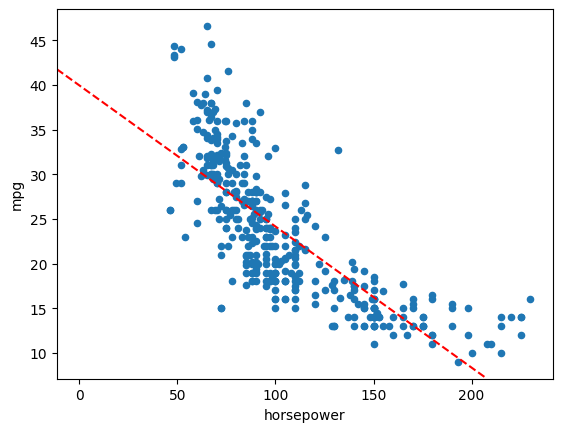

In [80]:
ax = Auto.plot.scatter('horsepower', 'mpg')
ax.axline((0, results.params['intercept']), slope = results.params['horsepower'], c='red', ls='--'); # plot the regression line

### Diagnostoc plots
Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

In [82]:
results.resid # we can find the residuals of the fit as attributes of the results object

name
chevrolet chevelle malibu    -1.416046
buick skylark 320             1.108520
plymouth satellite            1.740849
amc rebel sst                -0.259151
ford torino                  -0.837598
                               ...    
ford mustang gl               0.638786
vw pickup                    12.272065
dodge rampage                 5.323097
ford ranger                   0.533873
chevy s-10                    4.007407
Length: 392, dtype: float64

In [83]:
results.fittedvalues # we can find the fitted values as attributes of the results object

name
chevrolet chevelle malibu    19.416046
buick skylark 320            13.891480
plymouth satellite           16.259151
amc rebel sst                16.259151
ford torino                  17.837598
                               ...    
ford mustang gl              26.361214
vw pickup                    31.727935
dodge rampage                26.676903
ford ranger                  27.466127
chevy s-10                   26.992593
Length: 392, dtype: float64

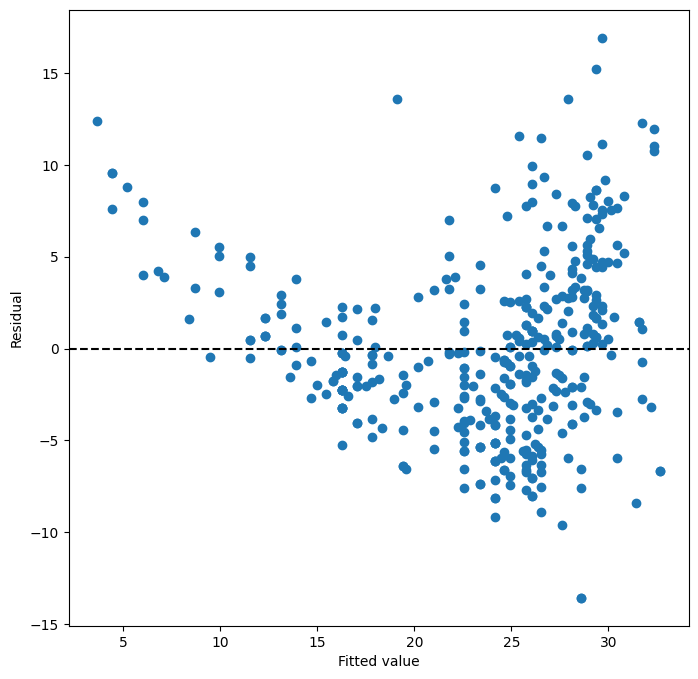

In [85]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--'); # add a horizontal line at 0 for reference, indicating it should be black (c='k') and have a dashed linestyle (ls='--').

On the basis of the residual plot, there is some evidence of non-linearity. 

115

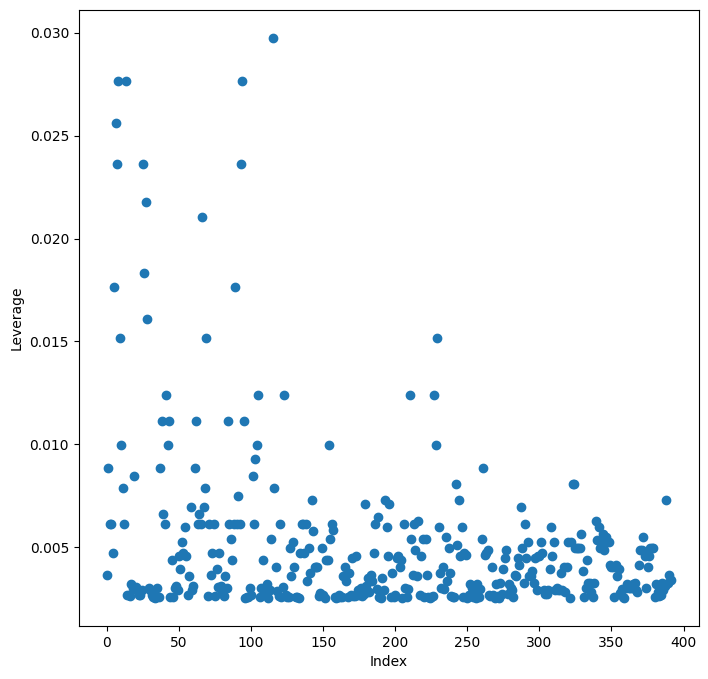

In [89]:
infl = results.get_influence() # Leverage statistics computed using the hat_matrix_diag attribute of the value returned by the get_influence() method
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')

# The np.argmax() function identifies the index of the largest element of an array, optionally computed over an axis of the array. 
# In this case, we maximized over the entire array to determine which observation has the largest leverage statistic.
np.argmax(infl.hat_matrix_diag) 